# Introduction to Projection.

In this first section we're going to simulate the point projection on the a camera sensor.

First let's import some usefull libraries and functions

In [1]:
import numpy as np
from numpy import cos, sin, pi
from functools import reduce
from matplotlib import pyplot as plt

Let's write a function that computes a transformation matrix given an angle in radians, a translation and a scale

In [2]:

def computeTransformation(angles, t, s): 
    """ Compute the transformation matrix from a given translation, rotation and scale
    Args:
        angles: list of 3 floats, the rotation angles in radians
        t: list of 3 floats, the translation
        s: float, the scale
    Returns:
        4x4 numpy array, the transformation matrix
    """
    theta= angles[0]
    Rx = np.array([
        [1, 0, 0, 0],
        [0, cos(theta), -sin(theta), 0],
        [0, sin(theta), cos(theta), 0],
        [0, 0, 0, 1]
    ])
    theta = angles[1]
    Ry = np.array([
        [cos(theta), 0, sin(theta), 0],
        [0, 1, 0, 0],
        [-sin(theta),0, cos(theta), 0],
        [0, 0, 0, 1]
    ])
    theta = angles[2]
    Rz = np.array([
        [cos(theta), -sin(theta), 0, 0],
        [sin(theta), cos(theta), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])



    T = np.identity(4)
    T[:3,3]=t

    S = np.identity(4)*s
    S[-1,-1] = 1

    return reduce(np.dot, (Rx,Ry,Rz,T,S))



Now lets write a function that returns the projection matrix of a camera. It takes the extrinsique paramters (rotation and translation) and intrinsique parameter matrix K(3 × 3)

In [3]:
def make_projection_matrix(theta_x, theta_y, theta_z, t_x, t_y, t_z, K):
    # we want the camera to be at the coordinates (t_x, t_y, t_z) in our world system
    # but the translation matrix represents the action that we need to perform in order to move the
    # world coordinate system to fit the camera coordinate system (i.e. the camera is at the new origin)
    # thus we invert the sign of the translation
    # the same is true for the rotation
    M_ext = computeTransformation((-theta_x, -theta_y, -theta_z), (-t_x, -t_y, -t_z), 1)
    M_int = np.hstack((K, np.zeros((3,1))))
    return M_int.dot(M_ext)


Let's now write a function that implements the image formation process. This function allows to map 3D points in to image pixels. P is the camera projection matrix, while X(3 × n) is a set of 3D points. The function return a (2 × n) matrix. We use the homogeneous coordinate frame.

In [4]:
def project(P, X):
    res = P.dot(X)
    res = res/res[2, :] # we bring the poiints to the rigth scale
    return res


Let's test our function

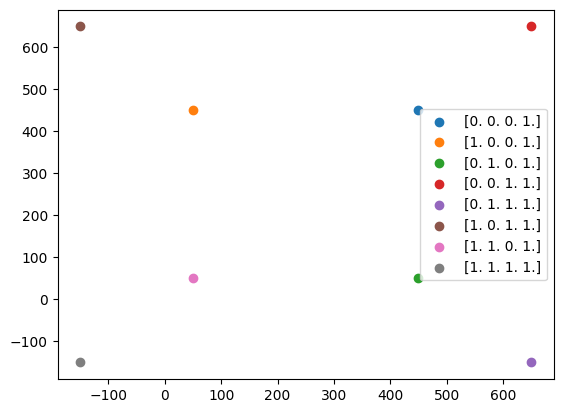

In [5]:

K = np.array([[800, 0,   250], 
              [0,   800, 250], 
              [0,   0,   1]])

r = (0, 0, 0)
t = (.5, .5, 2) 

cube = np.vstack((np.zeros((1,3)), 
                  np.identity(3), 
                  np.ones((3,3))-np.identity(3), 
                  np.ones((1,3)))).transpose()

cube = np.vstack((cube, np.ones((1,cube.shape[1]))))

P = make_projection_matrix(*r, *t, K)

cubeProjection = project(P, cube)

for i in range(8):
    plt.scatter(cubeProjection[0][i], cubeProjection[1][i], label=str(cube[:,i].transpose()) )
    plt.legend()
plt.show()

We can see how the perspective changes as we move the camera away from the cube. (The size of the frame doesn't change because matpolotlib simply displays the plotted points, but you can see that the scale of the plot has changed. )

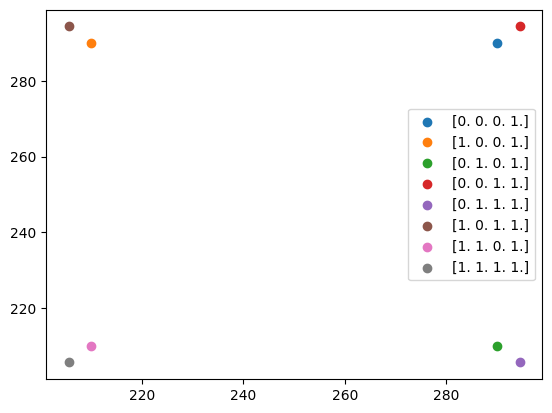

In [6]:
t = (.5, .5, 10) 
P = make_projection_matrix(*r, *t, K)

cubeProjection = project(P, cube)

for i in range(8):
    plt.scatter(cubeProjection[0][i], cubeProjection[1][i], label=str(cube[:,i].transpose()) )
    plt.legend()
plt.show()

Let's rotate our camera along the Z axis

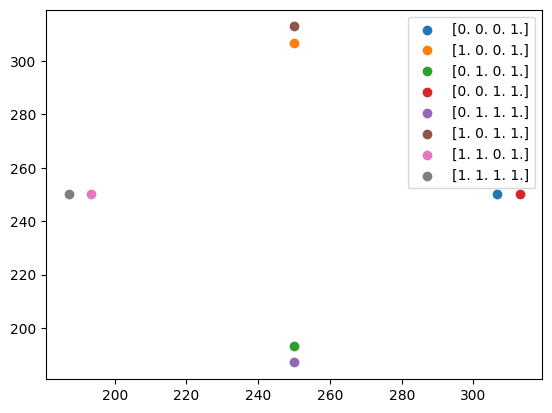

In [7]:
r = (0, 0, pi/4)
t = (.5, .5, 10) 
P = make_projection_matrix(*r, *t, K)

cubeProjection = project(P, cube)

for i in range(8):
    plt.scatter(cubeProjection[0][i], cubeProjection[1][i], label=str(cube[:,i].transpose()) )
    plt.legend()
plt.show()

The camera rotated 45° in trigonometric direction, accordingly the projected points rotated clockwise 45°